In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
import os

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning Models
from sklearn import svm  
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

# Model Evaluation Libraries
from sklearn.metrics import classification_report, confusion_matrix



from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
#making corpus or words from comments
import re
from nltk.stem.porter import PorterStemmer
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# Import Data Preprocessing Libraries 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning Models
from sklearn import svm  
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

# Model Evaluation Libraries
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning Models
from sklearn import svm  
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

# Model Evaluation Libraries
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
data = pd.read_excel("UrduTextAnnotatedData.xlsx")
data.head()

,Review Id,Text,Annotator 1,Annotator 2,Annotator 3
0,1.0,بھنڈی بنائی تھی بہت اچھی بنی تھ,pos,pos,pos
1,2.0,آہاں نائس بارکان ویسے اس موسم میں بھنڈی,pos,pos,pos
2,3.0,سوری ہمارے لیے موسم کوئی معنے رکھتے لوکیشن اہم...,neu,neu,neu
3,4.0,چکن کڑاہی,neu,neu,neu
4,5.0,ہاں تو بنا کے ہی کھائی نا,neu,neu,neu


In [5]:
data.describe()

,Review Id
count,1482.000000
mean,752.837382
std,434.506245
min,1.000000
25%,372.250000
50%,757.500000
75%,1128.750000
max,1500.000000


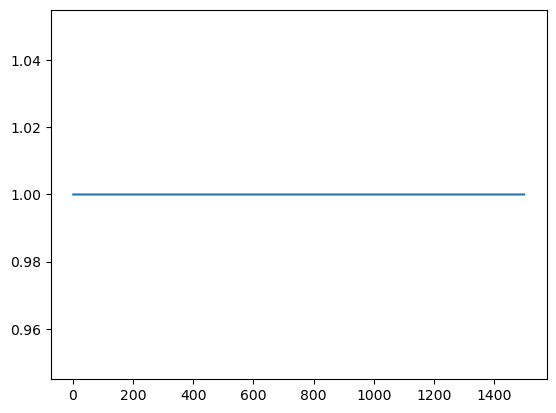

In [6]:
#Text preprocessing
### Data Cleansing

plt.plot(data['Review Id'].value_counts())

In [7]:
import urduhack
urduhack.download()
from urduhack.normalization import normalize
from urduhack.preprocessing import normalize_whitespace, remove_punctuation, remove_accents, replace_urls, replace_emails, replace_numbers, replace_currency_symbols, remove_english_alphabets

In [8]:
from typing import FrozenSet

# Urdu Language Stop words list


STOP_WORDS: FrozenSet[str] = frozenset("""
 آ آئی آئیں آئے آتا آتی آتے آس آمدید آنا آنسہ آنی آنے آپ آگے آہ آہا آیا اب ابھی ابے
 ارے اس اسکا اسکی اسکے اسی اسے اف افوہ البتہ الف ان اندر انکا انکی انکے انہوں انہی انہیں اوئے اور اوپر
 اوہو اپ اپنا اپنوں اپنی اپنے اپنےآپ اکثر اگر اگرچہ اہاہا ایسا ایسی ایسے ایک بائیں بار بارے بالکل باوجود باہر
 بج بجے بخیر بشرطیکہ بعد بعض بغیر بلکہ بن بنا بناؤ بند بڑی بھر بھریں بھی بہت بہتر تاکہ تاہم تب تجھ
 تجھی تجھے ترا تری تلک تم تمام تمہارا تمہاروں تمہاری تمہارے تمہیں تو تک تھا تھی تھیں تھے تیرا تیری تیرے
 جا جاؤ جائیں جائے جاتا جاتی جاتے جانی جانے جب جبکہ جدھر جس جسے جن جناب جنہوں جنہیں جو جہاں جی جیسا
 جیسوں جیسی جیسے حالانکہ حالاں حصہ حضرت خاطر خالی خواہ خوب خود دائیں درمیان دریں دو دوران دوسرا دوسروں دوسری دوں
 دکھائیں دی دیئے دیا دیتا دیتی دیتے دیر دینا دینی دینے دیکھو دیں دیے دے ذریعے رکھا رکھتا رکھتی رکھتے رکھنا رکھنی
 رکھنے رکھو رکھی رکھے رہ رہا رہتا رہتی رہتے رہنا رہنی رہنے رہو رہی رہیں رہے ساتھ سامنے ساڑھے سب سبھی
 سراسر سمیت سوا سوائے سکا سکتا سکتے سہ سہی سی سے شاید شکریہ صاحب صاحبہ صرف ضرور طرح طرف طور علاوہ عین
 فقط فلاں فی قبل قطا لئے لائی لائے لاتا لاتی لاتے لانا لانی لانے لایا لو لوجی لوگوں لگ لگا لگتا
 لگتی لگی لگیں لگے لہذا لی لیا لیتا لیتی لیتے لیکن لیں لیے لے ماسوا مت مجھ مجھی مجھے محترم محترمہ محض
 مرا مرحبا مری مرے مزید مس مسز مسٹر مطابق مل مکرمی مگر مگھر مہربانی میرا میروں میری میرے میں نا نزدیک
 نما نہ نہیں نیز نیچے نے و وار واسطے واقعی والا والوں والی والے واہ وجہ ورنہ وغیرہ ولے وگرنہ وہ وہاں
 وہی وہیں ویسا ویسے ویں پاس پایا پر پس پلیز پون پونی پونے پھر پہ پہلا پہلی پہلے پیر پیچھے چاہئے
 چاہتے چاہیئے چاہے چلا چلو چلیں چلے چناچہ چند چونکہ چکی چکیں چکے ڈالنا ڈالنی ڈالنے ڈالے کئے کا کاش کب کبھی
 کدھر کر کرتا کرتی کرتے کرم کرنا کرنے کرو کریں کرے کس کسی کسے کم کن کنہیں کو کوئی کون کونسا
 کونسے کچھ کہ کہا کہاں کہہ کہی کہیں کہے کی کیا کیسا کیسے کیونکر کیونکہ کیوں کیے کے گئی گئے گا گنا
 گو گویا گی گیا ہائیں ہائے ہاں ہر ہرچند ہرگز ہم ہمارا ہماری ہمارے ہمی ہمیں ہو ہوئی ہوئیں ہوئے ہوا
 ہوبہو ہوتا ہوتی ہوتیں ہوتے ہونا ہونگے ہونی ہونے ہوں ہی ہیلو ہیں ہے یا یات یعنی یک یہ یہاں یہی یہیں
""".split())


def remove_stopwords(text: str):
    return " ".join(word for word in text.split() if word not in STOP_WORDS)

In [9]:
len(STOP_WORDS)

430

In [10]:
print(STOP_WORDS)

frozenset({'ایسا', 'حصہ', 'نما', 'جس', 'افوہ', 'جبکہ', 'نا', 'ویں', 'تاکہ', 'جیسے', 'فقط', 'لگیں', 'لگے', 'گی', 'تلک', 'اوپر', 'دیتے', 'رکھتے', 'رہتی', 'ان', 'تم', 'تمہارے', 'ڈالنے', 'بخیر', 'سہ', 'صرف', 'بائیں', 'لہذا', 'بہت', 'لگی', 'آئے', 'آئی', 'حالاں', 'والے', 'تاہم', 'کونسا', 'حالانکہ', 'لیتا', 'یہی', 'جانی', 'ہوتی', 'وہی', 'دو', 'ہرگز', 'جسے', 'ایسے', 'تجھی', 'شکریہ', 'جو', 'رکھنا', 'کیا', 'وگرنہ', 'ویسے', 'وہیں', 'لے', 'تیری', 'چلے', 'بڑی', 'طرف', 'کسی', 'پونی', 'صاحب', 'دینا', 'رہ', 'مل', 'اسکا', 'آئیں', 'اپنی', 'جدھر', 'پھر', 'کرنے', 'کرتے', 'ہائے', 'دیکھو', 'کم', 'مگر', 'پہلی', 'واسطے', 'ہوئے', 'کرنا', 'علاوہ', 'لیں', 'کر', 'شاید', 'مجھے', 'اہاہا', 'بغیر', 'جاتا', 'اسکے', 'پہ', 'پونے', 'چلو', 'دے', 'بالکل', 'پیر', 'بند', 'مرا', 'چلا', 'سکتے', 'ہرچند', 'لگتا', 'کون', 'جاؤ', 'والوں', 'تھا', 'رہتا', 'چاہیئے', 'تری', 'سوا', 'اگرچہ', 'کرم', 'انکے', 'دوسری', 'کرو', 'رکھنے', 'ڈالنی', 'ہونی', 'ہوبہو', 'لوگوں', 'بن', 'لیا', 'بجے', 'ہونے', 'ہوں', 'بج', 'نیز', 'یعنی', 'مری', 'چناچہ', '

In [11]:
data['Review Id'].value_counts()

1.0       1
1002.0    1
1011.0    1
1010.0    1
1009.0    1
         ..
505.0     1
504.0     1
503.0     1
502.0     1
1500.0    1
Name: Review Id, Length: 1482, dtype: int64

In [12]:
# Removing Stops_Words

import urduhack

In [13]:
def removing_unwanted_data(text):
    text=re.sub(r'https?:\/\/.*[\r\n]*','',text,flags=re.MULTILINE)
    text=re.sub(r'\<a href','',text)
    text=re.sub(r'&amp;','',text)
    text=re.sub(r'[_"\-;%.,!?:#$@\[\]/]','',text)
    text=re.sub(r'<br />','',text)
    text=re.sub(r'\'','',text)
    
    
    text =  nltk.WordPunctTokenizer().tokenize(text)
        
    return text

In [14]:
data.columns =['ID','Sentences','Annotator 1','Annotator 2','Annotator 3']
data.head()

,ID,Sentences,Annotator 1,Annotator 2,Annotator 3
0,1.0,بھنڈی بنائی تھی بہت اچھی بنی تھ,pos,pos,pos
1,2.0,آہاں نائس بارکان ویسے اس موسم میں بھنڈی,pos,pos,pos
2,3.0,سوری ہمارے لیے موسم کوئی معنے رکھتے لوکیشن اہم...,neu,neu,neu
3,4.0,چکن کڑاہی,neu,neu,neu
4,5.0,ہاں تو بنا کے ہی کھائی نا,neu,neu,neu


In [15]:

data['text_cleaned']= list(map(removing_unwanted_data,data.Sentences))
data.head()

,ID,Sentences,Annotator 1,Annotator 2,Annotator 3,text_cleaned
0,1.0,بھنڈی بنائی تھی بہت اچھی بنی تھ,pos,pos,pos,"[بھنڈی, بنائی, تھی, بہت, اچھی, بنی, تھ]"
1,2.0,آہاں نائس بارکان ویسے اس موسم میں بھنڈی,pos,pos,pos,"[آہاں, نائس, بارکان, ویسے, اس, موسم, میں, بھنڈی]"
2,3.0,سوری ہمارے لیے موسم کوئی معنے رکھتے لوکیشن اہم...,neu,neu,neu,"[سوری, ہمارے, لیے, موسم, کوئی, معنے, رکھتے, لو..."
3,4.0,چکن کڑاہی,neu,neu,neu,"[چکن, کڑاہی]"
4,5.0,ہاں تو بنا کے ہی کھائی نا,neu,neu,neu,"[ہاں, تو, بنا, کے, ہی, کھائی, نا]"


In [16]:
# Lemmatization

import json

from urduhack.config import LEMMA_LOOKUP_TABLE_PATH

_WORD2LEMMA = None

In [17]:
def lemma_lookup(text, lookup_path: str = LEMMA_LOOKUP_TABLE_PATH) -> list:
    tokens = text
    global _WORD2LEMMA
    if _WORD2LEMMA is None:
        with open(lookup_path, "r", encoding="utf-8") as file:
            _WORD2LEMMA = json.load(file)

    return [_WORD2LEMMA[word] if word in _WORD2LEMMA else word for word in tokens]

data['Lemmatized'] =list(map(lemma_lookup,data.text_cleaned))

In [18]:
data.head()

,ID,Sentences,Annotator 1,Annotator 2,Annotator 3,text_cleaned,Lemmatized
0,1.0,بھنڈی بنائی تھی بہت اچھی بنی تھ,pos,pos,pos,"[بھنڈی, بنائی, تھی, بہت, اچھی, بنی, تھ]","[بھنڈی, بننا, ہونا, بہت, اچھی, بننا, تھ]"
1,2.0,آہاں نائس بارکان ویسے اس موسم میں بھنڈی,pos,pos,pos,"[آہاں, نائس, بارکان, ویسے, اس, موسم, میں, بھنڈی]","[آہاں, نائس, بارکان, ویسا, میں, موسم, میں, بھنڈی]"
2,3.0,سوری ہمارے لیے موسم کوئی معنے رکھتے لوکیشن اہم...,neu,neu,neu,"[سوری, ہمارے, لیے, موسم, کوئی, معنے, رکھتے, لو...","[سوری, ہمارہ, لینا, موسم, کوئی, معنے, رکھنا, ل..."
3,4.0,چکن کڑاہی,neu,neu,neu,"[چکن, کڑاہی]","[چکن, کڑاہی]"
4,5.0,ہاں تو بنا کے ہی کھائی نا,neu,neu,neu,"[ہاں, تو, بنا, کے, ہی, کھائی, نا]","[ہاں, ت, بننا, کم, ہی, کھائی, نا]"


In [19]:
# Bag of word (BOW)

BOW_convert = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
x = BOW_convert.fit_transform(data['text_cleaned'])

words = BOW_convert.get_feature_names()
print("The total number of columns are =",len(words))
print('Shape of arrays =',x.toarray().shape)


The total number of columns are = 3619
Shape of arrays = (1507, 3619)


E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
df =  data.copy()
df.head()

,ID,Sentences,Annotator 1,Annotator 2,Annotator 3,text_cleaned,Lemmatized
0,1.0,بھنڈی بنائی تھی بہت اچھی بنی تھ,pos,pos,pos,"[بھنڈی, بنائی, تھی, بہت, اچھی, بنی, تھ]","[بھنڈی, بننا, ہونا, بہت, اچھی, بننا, تھ]"
1,2.0,آہاں نائس بارکان ویسے اس موسم میں بھنڈی,pos,pos,pos,"[آہاں, نائس, بارکان, ویسے, اس, موسم, میں, بھنڈی]","[آہاں, نائس, بارکان, ویسا, میں, موسم, میں, بھنڈی]"
2,3.0,سوری ہمارے لیے موسم کوئی معنے رکھتے لوکیشن اہم...,neu,neu,neu,"[سوری, ہمارے, لیے, موسم, کوئی, معنے, رکھتے, لو...","[سوری, ہمارہ, لینا, موسم, کوئی, معنے, رکھنا, ل..."
3,4.0,چکن کڑاہی,neu,neu,neu,"[چکن, کڑاہی]","[چکن, کڑاہی]"
4,5.0,ہاں تو بنا کے ہی کھائی نا,neu,neu,neu,"[ہاں, تو, بنا, کے, ہی, کھائی, نا]","[ہاں, ت, بننا, کم, ہی, کھائی, نا]"


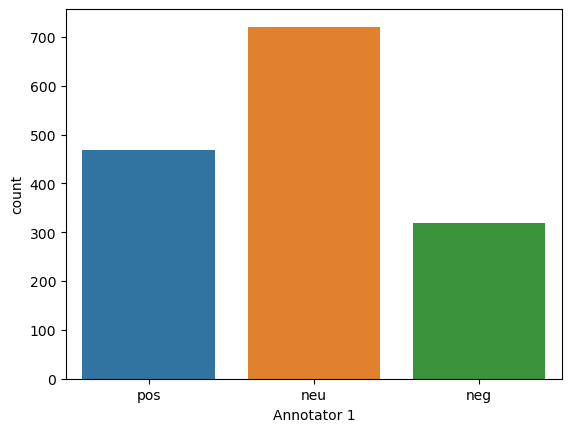

In [21]:
sns.countplot( x = 'Annotator 1', data = df );

In [22]:
train =  pd.read_excel('UrduTextAnnotatedData.xlsx')
test =   pd.read_excel('UrduTextAnnotatedData.xlsx')
print('Shape of Training Set ' , train.shape,'\nShape of Testing Set ', test.shape)

Shape of Training Set  (1507, 5) 
Shape of Testing Set  (1507, 5)


In [23]:
data =  pd.concat([train, test]).reset_index(drop=True)
print(data.shape)

(3014, 5)


In [24]:
df =  data.copy()
df.head()

,Review Id,Text,Annotator 1,Annotator 2,Annotator 3
0,1.0,بھنڈی بنائی تھی بہت اچھی بنی تھ,pos,pos,pos
1,2.0,آہاں نائس بارکان ویسے اس موسم میں بھنڈی,pos,pos,pos
2,3.0,سوری ہمارے لیے موسم کوئی معنے رکھتے لوکیشن اہم...,neu,neu,neu
3,4.0,چکن کڑاہی,neu,neu,neu
4,5.0,ہاں تو بنا کے ہی کھائی نا,neu,neu,neu


In [25]:
le = LabelEncoder()
le.fit(df['Annotator 1'])
df['encoded_Annotator 1'] = le.transform(df['Annotator 1'])

In [26]:
df.head()

,Review Id,Text,Annotator 1,Annotator 2,Annotator 3,encoded_Annotator 1
0,1.0,بھنڈی بنائی تھی بہت اچھی بنی تھ,pos,pos,pos,2
1,2.0,آہاں نائس بارکان ویسے اس موسم میں بھنڈی,pos,pos,pos,2
2,3.0,سوری ہمارے لیے موسم کوئی معنے رکھتے لوکیشن اہم...,neu,neu,neu,1
3,4.0,چکن کڑاہی,neu,neu,neu,1
4,5.0,ہاں تو بنا کے ہی کھائی نا,neu,neu,neu,1


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(df['Text'], df['encoded_Annotator 1'], test_size = 0.30, random_state = 7)

In [28]:
print('Shape of X_train', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of Y_train', Y_train.shape)
print('Shape of Y_test', Y_test.shape)

Shape of X_train (2109,)
Shape of X_test (905,)
Shape of Y_train (2109,)
Shape of Y_test (905,)


In [29]:
max_feature_num = 50000
vectorizer = TfidfVectorizer(max_features=max_feature_num)
train_vecs = vectorizer.fit_transform(X_train)
test_vecs = TfidfVectorizer(max_features=max_feature_num, vocabulary=vectorizer.vocabulary_).fit_transform(X_test)

In [30]:
def SVM_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    SVM = svm.LinearSVC(max_iter=100)
    SVM.fit(train_vecs, Y_train)

    # Testing
    test_predictionSVM = SVM.predict(test_vecs)
    return classification_report(test_predictionSVM, Y_test), confusion_matrix(test_predictionSVM, Y_test)

In [31]:
def LR_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    LR = LogisticRegression()
    LR.fit(train_vecs, Y_train)

    # testing
    test_predictionLR = LR.predict(test_vecs)
    return classification_report(test_predictionLR, Y_test) , confusion_matrix(test_predictionLR, Y_test)

In [32]:
def DT_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    DT = DecisionTreeClassifier(max_depth = 9, random_state = 23 )
    DT.fit(train_vecs, Y_train)

    # Testing
    test_predictionDT = DT.predict(test_vecs)
    return classification_report(test_predictionDT, Y_test), confusion_matrix(test_predictionDT, Y_test) 

In [33]:
def XGB_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    XGB = xgb.XGBClassifier(colsample_bytree = 0.2, learning_rate = 0.01, n_estimators = 100)
    XGB.fit(train_vecs, Y_train)

    # Testing
    test_predictionXGB = XGB.predict(test_vecs)
    return classification_report(test_predictionXGB, Y_test), confusion_matrix(test_predictionXGB, Y_test) 

In [34]:
def RF_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    RF = RandomForestClassifier(n_estimators = 450, max_depth=9, random_state=43)
    RF.fit(train_vecs, Y_train)

    # Testing
    test_predictionRF = RF.predict(test_vecs)
    return classification_report(test_predictionRF, Y_test), confusion_matrix(test_predictionRF, Y_test)

In [35]:
class_report , conf_matrix = SVM_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of SVM Classifier on TF-IDF Vectorizer')
print(class_report)
print(conf_matrix)

Results of SVM Classifier on TF-IDF Vectorizer
              precision    recall  f1-score   support

           0       0.83      0.95      0.88       169
           1       0.94      0.91      0.93       447
           2       0.91      0.89      0.90       289

    accuracy                           0.91       905
   macro avg       0.90      0.92      0.90       905
weighted avg       0.91      0.91      0.91       905

[[160   4   5]
 [ 21 407  19]
 [ 12  20 257]]


In [36]:
class_report , conf_matrix = LR_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of Logistic Regression Classifier on TF-IDF Vectorizer')
print(class_report)
print(conf_matrix)

Results of Logistic Regression Classifier on TF-IDF Vectorizer
              precision    recall  f1-score   support

           0       0.64      0.85      0.73       146
           1       0.93      0.76      0.84       527
           2       0.75      0.91      0.82       232

    accuracy                           0.81       905
   macro avg       0.77      0.84      0.80       905
weighted avg       0.84      0.81      0.82       905

[[124  13   9]
 [ 64 401  62]
 [  5  17 210]]


In [37]:
class_report , conf_matrix = DT_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of Decision Tree Classifier on TF-IDF Vectorizer')
print(class_report)
print(conf_matrix)

Results of Decision Tree Classifier on TF-IDF Vectorizer
              precision    recall  f1-score   support

           0       0.63      0.75      0.68       161
           1       0.91      0.65      0.76       605
           2       0.44      0.90      0.60       139

    accuracy                           0.70       905
   macro avg       0.66      0.77      0.68       905
weighted avg       0.79      0.70      0.72       905

[[121  26  14]
 [ 71 392 142]
 [  1  13 125]]


In [38]:
class_report , conf_matrix = XGB_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of Xgboost Classifier on TF-IDF Vectorizer')
print(class_report)
print(conf_matrix)

Results of Xgboost Classifier on TF-IDF Vectorizer
              precision    recall  f1-score   support

           0       0.18      0.95      0.30        37
           1       0.99      0.56      0.72       757
           2       0.37      0.95      0.54       111

    accuracy                           0.62       905
   macro avg       0.51      0.82      0.52       905
weighted avg       0.88      0.62      0.68       905

[[ 35   1   1]
 [157 425 175]
 [  1   5 105]]


In [39]:
class_report , conf_matrix = RF_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of Random Forest Classifier on TF-IDF Vectorizer')
print(class_report)
print(conf_matrix)

Results of Random Forest Classifier on TF-IDF Vectorizer
              precision    recall  f1-score   support

           0       0.02      1.00      0.03         3
           1       1.00      0.50      0.67       855
           2       0.16      0.96      0.27        47

    accuracy                           0.53       905
   macro avg       0.39      0.82      0.32       905
weighted avg       0.95      0.53      0.64       905

[[  3   0   0]
 [190 429 236]
 [  0   2  45]]


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3014 entries, 0 to 3013
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Review Id    2964 non-null   float64
 1   Text         3014 non-null   object 
 2   Annotator 1  3014 non-null   object 
 3   Annotator 2  3014 non-null   object 
 4   Annotator 3  3014 non-null   object 
dtypes: float64(1), object(4)
memory usage: 117.9+ KB
